In [ ]:
# 한글 폰트 설정
# 한글 폰트 설치 코드
# !apt-get update -qq
# !apt-get install fonts-nanum* -qq
# 설치 후 런타임 재시작 필요

Selecting previously unselected package fonts-nanum-eco.
(Reading database ... 155671 files and directories currently installed.)
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
# 한글폰트 사용 in colab
%matplotlib inline  

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

NanumBarunGothic


In [ ]:
import pandas as pd
plt.rcParams['axes.unicode_minus'] = False # 마이너스 표시
# 데이터 불러오기
train = pd.read_csv('/content/drive/MyDrive/데이터분석 스터디/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/데이터분석 스터디/data/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/데이터분석 스터디/data/sample_submission.csv')

train.head(3)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# 요일 숫자로 매핑
train['요일'] = train['요일'].map({'월':0, '화':1, '수':2, '목':3, '금':4})
test['요일'] = test['요일'].map({'월':0, '화':1, '수':2, '목':3, '금':4})

In [ ]:
# 수치데이터만 피처로 선택
x_train = train[['요일', '본사정원수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수']]
y1_train = train['중식계']
y2_train = train['석식계']

x_test = test[['요일', '본사정원수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수']]

In [ ]:
# 점심/저녁 식수 인원 예측할 모델 2개 생성
rf_lunch = RandomForestRegressor(n_jobs=-1, random_state=42)
rf_dinner = RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
# 학습
rf_lunch.fit(x_train, y1_train)
rf_dinner.fit(x_train, y2_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
# 추론
pred1 = rf_lunch.predict(x_test)
pred2 = rf_dinner.predict(x_test)

### 피처 중요도 확인

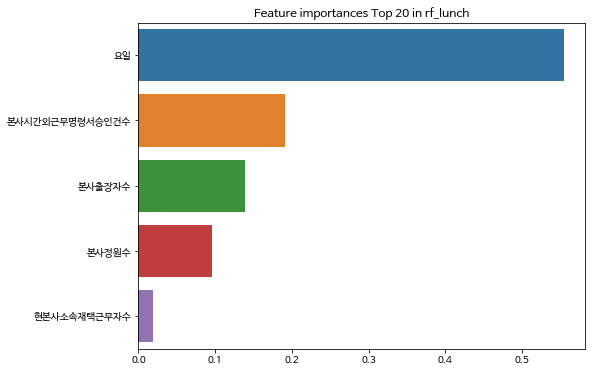

In [ ]:
import seaborn as sns

importances_values = rf_lunch.feature_importances_
importances = pd.Series(importances_values, index=x_train.columns)
top20 = importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20 in rf_lunch')
sns.barplot(x = top20, y = top20.index)
plt.show()

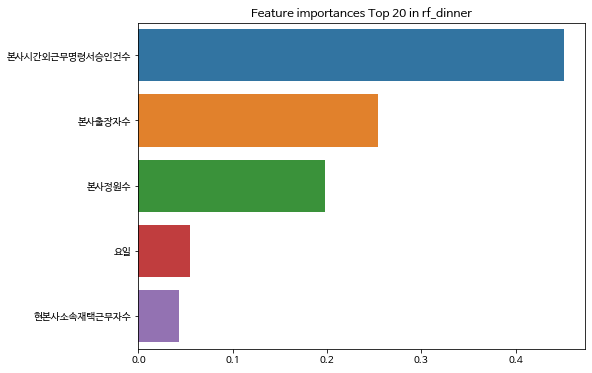

In [ ]:
import seaborn as sns

importances_values = rf_dinner.feature_importances_
importances = pd.Series(importances_values, index=x_train.columns)
top20 = importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20 in rf_dinner')
sns.barplot(x = top20, y = top20.index)
plt.show()

In [ ]:
# 결과 제출
submission['중식계'] = pred1
submission['석식계'] = pred2

In [ ]:
submission.to_csv('baseline.csv', index=False)

121.83433 (603등)